# Getting started

Once you've chosen your scenario from the README, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Scenario and Problem Statement

In [1]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

In [2]:
# Load the data
df = pd.read_csv("../assets/Iowa_Liquor_sales_sample_10pct.csv")

In [3]:
# Initial Look at dataset
df.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
df.count()

Date                     270955
Store Number             270955
City                     270955
Zip Code                 270955
County Number            269878
County                   269878
Category                 270887
Category Name            270323
Vendor Number            270955
Item Number              270955
Item Description         270955
Bottle Volume (ml)       270955
State Bottle Cost        270955
State Bottle Retail      270955
Bottles Sold             270955
Sale (Dollars)           270955
Volume Sold (Liters)     270955
Volume Sold (Gallons)    270955
dtype: int64

In [5]:
# Remove redundant columns
dfn = df.dropna()
dfn.drop(["Category","Category Name","Vendor Number","Item Number","Item Description", "Volume Sold (Gallons)"], axis=1, inplace=True)
# Rename columns
# Remove the spaces and () from headers replacing spaces with underscores
dfn.rename(columns = lambda head: head.replace(" ","_"), inplace=True)
dfn.rename(columns = lambda head: head.replace("(",""), inplace=True)
dfn.rename(columns = lambda head: head.replace(")",""), inplace=True)

cols = ["Date","Store_Number","County", "City", "Zip_Code","County_Number", "State_Bottle_Cost", "State_Bottle_Retail", "Bottles_Sold","Sale_Dollars","Bottle_Volume_ml", "Volume_Sold_Liters"]
dfn = dfn[cols]
dfn.head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/alexandertam/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Date,Store_Number,County,City,Zip_Code,County_Number,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Bottle_Volume_ml,Volume_Sold_Liters
0,11/04/2015,3717,Bremer,SUMNER,50674,9.0,$4.50,$6.75,12,$81.00,750,9.0
1,03/02/2016,2614,Scott,DAVENPORT,52807,82.0,$13.75,$20.63,2,$41.26,750,1.5
2,02/11/2016,2106,Black Hawk,CEDAR FALLS,50613,7.0,$12.59,$18.89,24,$453.36,1000,24.0
3,02/03/2016,2501,Story,AMES,50010,85.0,$9.50,$14.25,6,$85.50,1750,10.5
4,08/18/2015,3654,Wright,BELMOND,50421,99.0,$7.20,$10.80,12,$129.60,1750,21.0


In [6]:
# Remove $ from certain columns
# strip method to remove $
dfn["Sale_Dollars"] = [ x.strip("$") for x in dfn["Sale_Dollars"]]
# change values to float
dfn["Sale_Dollars"] = [float(x) for x in dfn["Sale_Dollars"]]
dfn["State_Bottle_Cost"] = [ x.strip("$") for x in dfn["State_Bottle_Cost"] ]
dfn["State_Bottle_Cost"] = [float(x) for x in dfn["State_Bottle_Cost"]]
dfn["State_Bottle_Retail"] = [ x.strip("$") for x in dfn["State_Bottle_Retail"] ]
dfn["State_Bottle_Retail"] = [float(x) for x in dfn["State_Bottle_Retail"]]
dfn.head()

,Date,Store_Number,County,City,Zip_Code,County_Number,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Bottle_Volume_ml,Volume_Sold_Liters
0,11/04/2015,3717,Bremer,SUMNER,50674,9.0,4.50,6.75,12,81.00,750,9.0
1,03/02/2016,2614,Scott,DAVENPORT,52807,82.0,13.75,20.63,2,41.26,750,1.5
2,02/11/2016,2106,Black Hawk,CEDAR FALLS,50613,7.0,12.59,18.89,24,453.36,1000,24.0
3,02/03/2016,2501,Story,AMES,50010,85.0,9.50,14.25,6,85.50,1750,10.5
4,08/18/2015,3654,Wright,BELMOND,50421,99.0,7.20,10.80,12,129.60,1750,21.0


In [10]:
# Convert dates
dfn["Date"] = pd.to_datetime(dfn["Date"])
dfn.dtypes

Date                   datetime64[ns]
Store_Number                    int64
County                         object
City                           object
Zip_Code                       object
County_Number                   int64
State_Bottle_Cost             float64
State_Bottle_Retail           float64
Bottles_Sold                    int64
Sale_Dollars                  float64
Bottle_Volume_ml                int64
Volume_Sold_Liters            float64
dtype: object

In [11]:
#Drop or replace bad values
# Convert integers
dfn["County_Number"] = [int(cnum) for cnum in dfn["County_Number"]]

# Convert from integers



In [12]:
dfn.head()

,Date,Store_Number,County,City,Zip_Code,County_Number,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Bottle_Volume_ml,Volume_Sold_Liters
0,2015-11-04,3717,Bremer,SUMNER,50674,9,4.50,6.75,12,81.00,750,9.0
1,2016-03-02,2614,Scott,DAVENPORT,52807,82,13.75,20.63,2,41.26,750,1.5
2,2016-02-11,2106,Black Hawk,CEDAR FALLS,50613,7,12.59,18.89,24,453.36,1000,24.0
3,2016-02-03,2501,Story,AMES,50010,85,9.50,14.25,6,85.50,1750,10.5
4,2015-08-18,3654,Wright,BELMOND,50421,99,7.20,10.80,12,129.60,1750,21.0


## Explore the data

Perform EDA and Viz, such as histograms of transaction totals, bottles sold, etc.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Determine which stores were open all of 2015
# Find the first and last sales date.

#First Date 1/5/2015 
#dfn.sort_values(by="Date").head()

#Last Date 3/31/2016 
#dfn.sort_values(by="Date").tail()

# Filter out stores that opened or closed throughout the year
# removed during drop.na from dataframe
dfn.isnull().sum()

# You may want to save this step until you start modelling

Date                   0
Store_Number           0
County                 0
City                   0
Zip_Code               0
County_Number          0
State_Bottle_Cost      0
State_Bottle_Retail    0
Bottles_Sold           0
Sale_Dollars           0
Bottle_Volume_ml       0
Volume_Sold_Liters     0
dtype: int64

In [20]:
# Margin and Price per liter
# Margin
dfn["Margin"] = dfn["State_Bottle_Retail"] - dfn["State_Bottle_Cost"]
# Price per Liter  
dfn["Price_per_Liter"] = dfn["State_Bottle_Retail"]/(dfn["Bottle_Volume_ml"]/1000)

dfn.head()

,Date,Store_Number,County,City,Zip_Code,County_Number,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Bottle_Volume_ml,Volume_Sold_Liters,Margin,Price_per_Liter
22111,2015-01-08,2106,Black Hawk,CEDAR FALLS,50613,7,9.50,14.25,36,513.00,1000,36.0,4.75,14.25
47659,2015-01-08,2106,Black Hawk,CEDAR FALLS,50613,7,27.00,40.50,12,486.00,750,9.0,13.50,54.00
65214,2015-01-08,2106,Black Hawk,CEDAR FALLS,50613,7,5.78,8.67,12,104.04,750,9.0,2.89,11.56
66346,2015-01-08,2106,Black Hawk,CEDAR FALLS,50613,7,12.50,18.75,12,225.00,750,9.0,6.25,25.00
80570,2015-01-08,2106,Black Hawk,CEDAR FALLS,50613,7,4.34,6.51,12,78.12,1000,12.0,2.17,6.51


In [21]:
# Sales per store, 2015

# Filter by our start and end dates
dfn.sort_values(by=["Store_Number", "Date"], inplace=True)
start_date = pd.Timestamp("2015-01-01")
end_date = pd.Timestamp("2015-12-31")
mask = (dfn['Date'] >= start_date) & (dfn['Date'] <= end_date)
sales2015 = dfn[mask]

# Group by store name
sales2015 = sales2015.groupby(by=["Store_Number"], as_index=False)
# Compute sums, means
sales2015 = sales2015.agg({"Sale_Dollars": [np.sum, np.mean],
                   "Volume_Sold_Liters": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price_per_Liter": np.mean,
                   "Zip_Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County_Number": lambda x: x.iloc[0],
                          })
# Collapse the column indices
sales2015.columns = [' '.join(col).strip() for col in sales2015.columns.values]
# Rename columns
sales2015.columns =["Store_Number","City","Sale_Dollars_sum_2015","Sale_Dollars_mean_2015","County_Number","Volume_Sold_Liters_sum_2015","Volume_Sold_Liters_mean_2015","Price_per_Liter_mean_2015","Margin_mean_2015","Zip_Code" ]

# Quick check
sales2015.head()

,Store_Number,City,Sale_Dollars_sum_2015,Sale_Dollars_mean_2015,County_Number,Volume_Sold_Liters_sum_2015,Volume_Sold_Liters_mean_2015,Price_per_Liter_mean_2015,Margin_mean_2015,Zip_Code
0,2106,CEDAR FALLS,146038.70,277.640114,7,9719.85,18.478802,17.844997,5.160951,50613
1,2113,GOWRIE,9310.22,63.334830,94,659.85,4.488776,18.504292,5.445102,50543
2,2130,WATERLOO,111583.91,285.380844,7,6879.37,17.594297,16.817449,4.918005,50703
3,2152,ROCKWELL,7721.08,54.759433,17,633.37,4.491986,13.020983,4.322624,50469
4,2178,WAUKON,24324.18,102.633671,3,1917.12,8.089114,16.062136,4.868861,52172


In [22]:
# Sales 2015  Q1
# Filter by our start and end dates
dfn.sort_values(by=["Store_Number", "Date"], inplace=True)
start_date = pd.Timestamp("2015-01-01")
end_date = pd.Timestamp("2015-03-31")
mask = (dfn['Date'] >= start_date) & (dfn['Date'] <= end_date)
sales2015Q1 = dfn[mask]

# Group by store name
sales2015Q1 = sales2015Q1.groupby(by=["Store_Number"], as_index=False)
# Compute sums, means
sales2015Q1 = sales2015Q1.agg({"Sale_Dollars": [np.sum, np.mean],
                   "Volume_Sold_Liters": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price_per_Liter": np.mean,
                   "Zip_Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County_Number": lambda x: x.iloc[0],
                              })
# Collapse the column indices
sales2015Q1.columns = [' '.join(col).strip() for col in sales2015Q1.columns.values]
# Rename columns
sales2015Q1.columns =["Store_Number","City","Sale_Dollars_sum_2015Q1","Sale_Dollars_mean_2015Q1","County_Number","Volume_Sold_Liters_sum_2015Q1","Volume_Sold_Liters_mean_2015Q1","Price_per_Liter_mean_2015Q1","Margin_mean_2015Q1","Zip_Code" ]

# Quick check
sales2015Q1.head()


,Store_Number,City,Sale_Dollars_sum_2015Q1,Sale_Dollars_mean_2015Q1,County_Number,Volume_Sold_Liters_sum_2015Q1,Volume_Sold_Liters_mean_2015Q1,Price_per_Liter_mean_2015Q1,Margin_mean_2015Q1,Zip_Code
0,2106,CEDAR FALLS,39287.29,304.552636,7,2526.10,19.582171,17.846608,5.033721,50613
1,2113,GOWRIE,2833.25,67.458333,94,177.11,4.216905,19.358141,5.275000,50543
2,2130,WATERLOO,24272.57,278.995057,7,1447.25,16.635057,17.565430,5.140920,50703
3,2152,ROCKWELL,2003.46,62.608125,17,151.74,4.741875,13.991012,4.836875,50469
4,2178,WAUKON,5856.41,122.008542,3,409.81,8.537708,16.724712,4.932083,52172


In [23]:
# Sales 2016 Q1
# Filter by our start and end dates
dfn.sort_values(by=["Store_Number", "Date"], inplace=True)
start_date = pd.Timestamp("2016-01-01")
end_date = pd.Timestamp("2016-03-31")
mask = (dfn['Date'] >= start_date) & (dfn['Date'] <= end_date)
sales2016Q1 = dfn[mask]

# Group by store name
sales2016Q1 = sales2016Q1.groupby(by=["Store_Number"], as_index=False)
# Compute sums, means
sales2016Q1 = sales2016Q1.agg({"Sale_Dollars": [np.sum, np.mean],
                   "Volume_Sold_Liters": [np.sum, np.mean],
                   "Margin": np.mean, 
                   "Price_per_Liter": np.mean,
                   "Zip_Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County_Number": lambda x: x.iloc[0],
                              })
# Collapse the column indices
sales2016Q1.columns = [' '.join(col).strip() for col in sales2016Q1.columns.values]
# Rename columns
sales2016Q1.columns =["Store_Number","City","Sale_Dollars_sum_2016Q1","Sale_Dollars_mean_2016Q1","County_Number","Volume_Sold_Liters_sum_2016Q1","Volume_Sold_Liters_mean_2016Q1","Price_per_Liter_mean_2016Q1","Margin_mean_2016Q1","Zip_Code" ]

# Quick check
sales2016Q1.head()

,Store_Number,City,Sale_Dollars_sum_2016Q1,Sale_Dollars_mean_2016Q1,County_Number,Volume_Sold_Liters_sum_2016Q1,Volume_Sold_Liters_mean_2016Q1,Price_per_Liter_mean_2016Q1,Margin_mean_2016Q1,Zip_Code
0,2106,CEDAR FALLS,30478.75,241.894841,7,2116.25,16.795635,17.969769,5.196508,50613
1,2113,GOWRIE,2065.90,55.835135,94,177.00,4.783784,17.483024,5.367838,50543
2,2130,WATERLOO,27856.11,238.086410,7,1556.90,13.306838,17.452157,5.312222,50703
3,2152,ROCKWELL,904.66,45.233000,17,87.50,4.375000,12.487833,4.160500,50469
4,2178,WAUKON,5588.50,96.353448,3,520.80,8.979310,15.101929,4.648966,52172


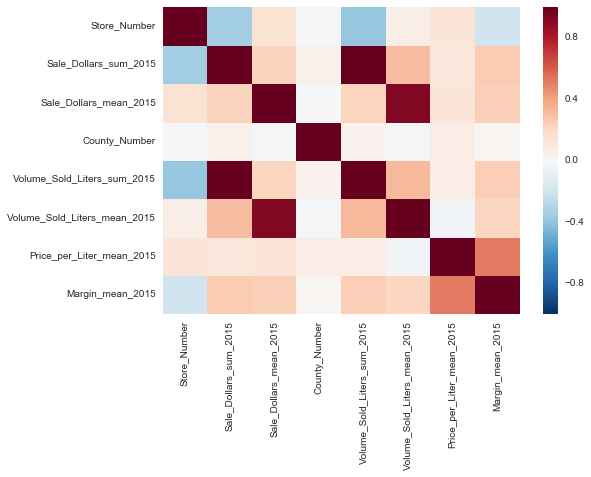

In [24]:
#Correlations Matrix 2015
sns.heatmap(sales2015.corr())

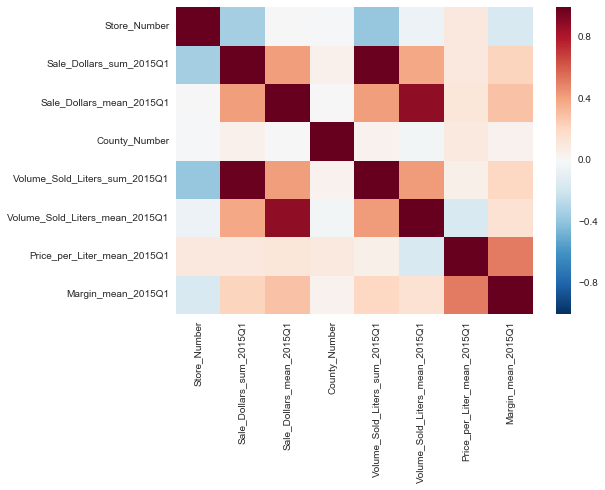

In [25]:
#2015Q1
sns.heatmap(sales2015Q1.corr())

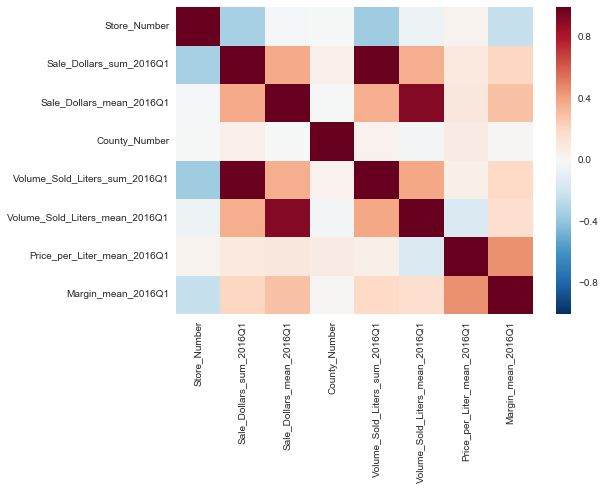

In [26]:
#2016Q1
sns.heatmap(sales2016Q1.corr())

2015Q1 charts similar to 2016Q1

In [ ]:
# tell me about some of the highest correlations

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

## Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

## Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

Both Q1 2015 and 2016 have very similar correlation matricies.

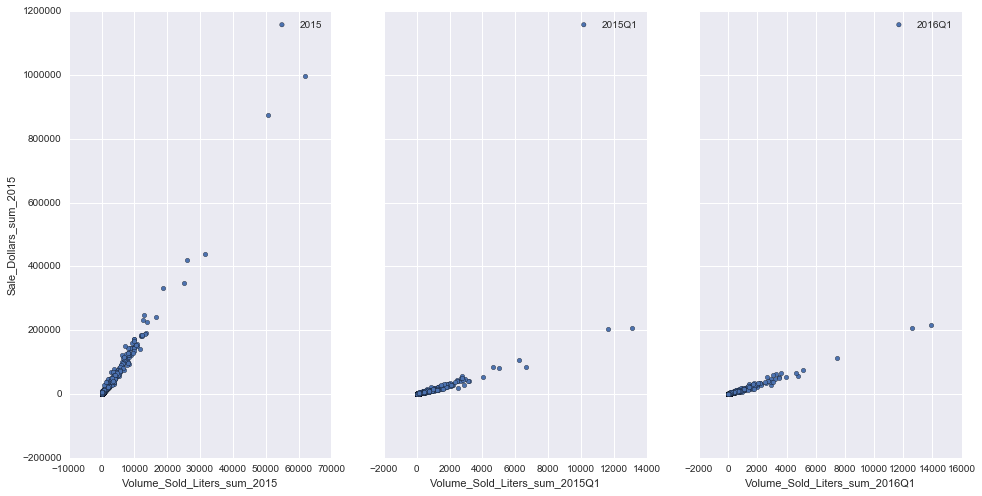

In [27]:
fig, axs = plt.subplots(1,3, sharey=True)
sales2015.plot(kind="scatter", x="Volume_Sold_Liters_sum_2015", y="Sale_Dollars_sum_2015", ax=axs[0], figsize=(16,8), label="2015" )
sales2015Q1.plot(kind="scatter", x="Volume_Sold_Liters_sum_2015Q1", y="Sale_Dollars_sum_2015Q1", ax=axs[1], label = "2015Q1" )
sales2016Q1.plot(kind="scatter", x="Volume_Sold_Liters_sum_2016Q1", y="Sale_Dollars_sum_2016Q1", ax=axs[2], label = "2016Q1" )

In [28]:
#AT - What does this trio of charts tell you?

## Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [29]:
#
df2015plusQ1 = pd.merge(sales2015Q1, sales2015, on = ("Store_Number","City","County_Number", "Zip_Code" ))
df2015plusQ1.head()

,Store_Number,City,Sale_Dollars_sum_2015Q1,Sale_Dollars_mean_2015Q1,County_Number,Volume_Sold_Liters_sum_2015Q1,Volume_Sold_Liters_mean_2015Q1,Price_per_Liter_mean_2015Q1,Margin_mean_2015Q1,Zip_Code,Sale_Dollars_sum_2015,Sale_Dollars_mean_2015,Volume_Sold_Liters_sum_2015,Volume_Sold_Liters_mean_2015,Price_per_Liter_mean_2015,Margin_mean_2015
0,2106,CEDAR FALLS,39287.29,304.552636,7,2526.10,19.582171,17.846608,5.033721,50613,146038.70,277.640114,9719.85,18.478802,17.844997,5.160951
1,2113,GOWRIE,2833.25,67.458333,94,177.11,4.216905,19.358141,5.275000,50543,9310.22,63.334830,659.85,4.488776,18.504292,5.445102
2,2130,WATERLOO,24272.57,278.995057,7,1447.25,16.635057,17.565430,5.140920,50703,111583.91,285.380844,6879.37,17.594297,16.817449,4.918005
3,2152,ROCKWELL,2003.46,62.608125,17,151.74,4.741875,13.991012,4.836875,50469,7721.08,54.759433,633.37,4.491986,13.020983,4.322624
4,2178,WAUKON,5856.41,122.008542,3,409.81,8.537708,16.724712,4.932083,52172,24324.18,102.633671,1917.12,8.089114,16.062136,4.868861


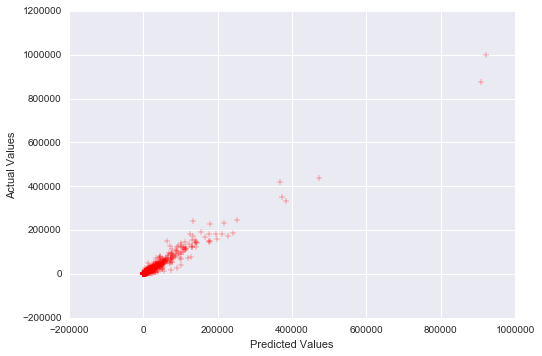

MSE: 101605029.139


0.96326403919821368

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df2015plusQ1[["Sale_Dollars_sum_2015Q1","Price_per_Liter_mean_2015Q1", "Margin_mean_2015Q1"]]
y = df2015plusQ1["Sale_Dollars_sum_2015"]

X16predict = sales2016Q1[["Sale_Dollars_sum_2016Q1","Price_per_Liter_mean_2016Q1", "Margin_mean_2016Q1"]]

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
pred2016 = model.predict(X16predict)

sales2016Q1["2016 Forecast"] = pred2016

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()
print "MSE:", mean_squared_error(y, predictions)
model.score(X,y)

In [38]:
#AT - This is great. Some other students didn't understand to put 2016 data into model.predict to predict the next year.

In [47]:
allsales2016 = sales2016Q1["2016 Forecast"].sum()
allsales2015 = sales2015["Sale_Dollars_sum_2015"].sum()

print "2015 Sales: ",allsales2015
print "Est. 2016 Sales: ",allsales2016

allsales2015 - allsales2016

2015 Sales:  28478661.98
Est. 2016 Sales:  28114090.5285


364571.4515487999

Sales Decrease in 2016

In [ ]:
#AT - this is a sales decrease is for 2016 Q1 not for the whole of 2016

In [31]:
X = sales2015
y = sales2015["Sale_Dollars_sum_2015"]

X_train, X_test, y_train, y_test = train_test_split(sales2015, y, test_size=0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(823, 10) (823,)
(549, 10) (549,)


In [32]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 

ValueError: invalid literal for float(): 712-2

In [37]:
#AT - the reason the above code does not work is because you have some columns that are strings.
# The fit function doesn't know how to convert those into floats.
# Your first model works because you only select certain columns - those columns were not floats

# Try removing City and Zipcode, those should not be good predictors of sales.


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

## Present the Results

Present your conclusions and results, including a Tableau Storyboard. If you have more than one interesting model feel free to include.

In [ ]:
#blog link: 

Score | 16/24
----|----
Identify: Problem Statement and Risks | 1
Acquire: Import with Pandas| 3
Parse: EDA | 3
Mine: Create columns/clean/format/process data| 3
Refine: Determine outliers and distribution, correlation, & statistical analysis| 1
Model: Create linear models; calculate probabilities, evaluate model, perform CV| 3
Present: Create executive summary, present findings, summarize, tailored for your audience| 2
Present: Blog | 0
Bonus: perform Ridge and Lasso regularization and explain what they do | 0

In [ ]:
#AT - Your model is great. You're just missing the other pieces.